🏠 SIMULACE SPOTŘEBY ENERGIE - 4 DOMÁCNOSTI SE SOLÁRNÍMI PANELY


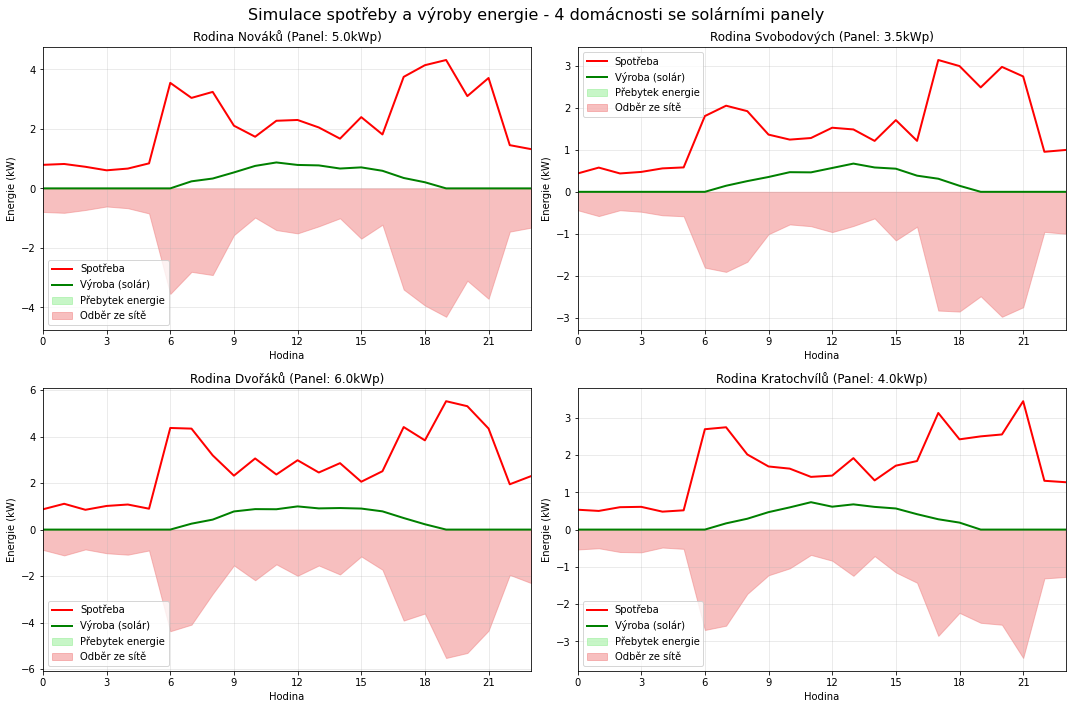


DENNÍ STATISTIKY DOMÁCNOSTÍ

Rodina Nováků:
  Celková denní spotřeba: 52.45 kWh
  Celková denní výroba:   6.82 kWh
  Denní bilance:          -45.63 kWh
  → Domácnost odebírá 45.63 kWh ze sítě
  Soběstačnost:           13.0%

Rodina Svobodových:
  Celková denní spotřeba: 36.24 kWh
  Celková denní výroba:   4.91 kWh
  Denní bilance:          -31.34 kWh
  → Domácnost odebírá 31.34 kWh ze sítě
  Soběstačnost:           13.5%

Rodina Dvořáků:
  Celková denní spotřeba: 66.06 kWh
  Celková denní výroba:   8.47 kWh
  Denní bilance:          -57.59 kWh
  → Domácnost odebírá 57.59 kWh ze sítě
  Soběstačnost:           12.8%

Rodina Kratochvílů:
  Celková denní spotřeba: 40.34 kWh
  Celková denní výroba:   5.60 kWh
  Denní bilance:          -34.73 kWh
  → Domácnost odebírá 34.73 kWh ze sítě
  Soběstačnost:           13.9%

CELKOVÉ SHRNUTÍ:
Celková spotřeba všech domácností: 195.09 kWh
Celková výroba všech domácností:   25.80 kWh
Celková bilance:                   -169.29 kWh
Průměrná soběstačnos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

class Domacnost:
    def __init__(self, nazev, zakladni_spotreba, solar_vkon, efektivita_panelu=0.2):
        self.nazev = nazev
        self.zakladni_spotreba = zakladni_spotreba  # kW
        self.solar_vkon = solar_vkon  # kWp (kiloWatt peak)
        self.efektivita_panelu = efektivita_panelu
        
    def vypocti_spotrebu(self, hodina):
        """Výpočet spotřeby podle denní doby"""
        # Typická spotřeba během dne (koeficient)
        if 0 <= hodina < 6:  # Noc
            koef = 0.3
        elif 6 <= hodina < 9:  # Ráno
            koef = 1.2
        elif 9 <= hodina < 17:  # Den
            koef = 0.8
        elif 17 <= hodina < 22:  # Večer
            koef = 1.5
        else:  # Pozdní večer
            koef = 0.6
            
        # Přidání náhodné variace ±20%
        variace = random.uniform(0.8, 1.2)
        return self.zakladni_spotreba * koef * variace
    
    def vypocti_solar_vyroba(self, hodina):
        """Výpočet výroby ze solárních panelů"""
        if hodina < 6 or hodina > 19:
            return 0  # V noci nevyrábí
        
        # Simulace sluneční intenzity (sinusová křivka)
        uhel_slunce = (hodina - 6) * np.pi / 13  # 6-19h -> 0-π
        intenzita = np.sin(uhel_slunce)
        
        # Náhodné výkyvy (mraky, atd.) ±30%
        pocasi_faktor = random.uniform(0.7, 1.0)
        
        return self.solar_vkon * intenzita * pocasi_faktor * self.efektivita_panelu

def simuluj_den():
    # Vytvoření 4 různých domácností
    domacnosti = [
        Domacnost("Rodina Nováků", 2.5, 5.0),      # Střední spotřeba, velké panely
        Domacnost("Rodina Svobodových", 1.8, 3.5),  # Nižší spotřeba, menší panely
        Domacnost("Rodina Dvořáků", 3.2, 6.0),     # Vyšší spotřeba, největší panely
        Domacnost("Rodina Kratochvílů", 2.0, 4.0)   # Střední spotřeba a panely
    ]
    
    hodiny = list(range(24))
    data = {dom.nazev: {'spotreba': [], 'vyroba': [], 'bilance': []} for dom in domacnosti}
    
    # Simulace pro každou hodinu
    for hodina in hodiny:
        for dom in domacnosti:
            spotreba = dom.vypocti_spotrebu(hodina)
            vyroba = dom.vypocti_solar_vyroba(hodina)
            bilance = vyroba - spotreba  # Kladná = přebytek, záporná = odběr ze sítě
            
            data[dom.nazev]['spotreba'].append(spotreba)
            data[dom.nazev]['vyroba'].append(vyroba)
            data[dom.nazev]['bilance'].append(bilance)
    
    return hodiny, data, domacnosti

def vykresli_grafy(hodiny, data, domacnosti):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Simulace spotřeby a výroby energie - 4 domácnosti se solárními panely', fontsize=16)
    
    colors = ['blue', 'green', 'red', 'orange']
    
    for i, dom in enumerate(domacnosti):
        ax = axes[i//2, i%2]
        nazev = dom.nazev
        
        # Vytvoření grafu pro jednotlivou domácnost
        ax.plot(hodiny, data[nazev]['spotreba'], 'r-', linewidth=2, label='Spotřeba')
        ax.plot(hodiny, data[nazev]['vyroba'], 'g-', linewidth=2, label='Výroba (solár)')
        ax.fill_between(hodiny, 0, data[nazev]['bilance'], 
                       where=[b >= 0 for b in data[nazev]['bilance']], 
                       color='lightgreen', alpha=0.5, label='Přebytek energie')
        ax.fill_between(hodiny, 0, data[nazev]['bilance'], 
                       where=[b < 0 for b in data[nazev]['bilance']], 
                       color='lightcoral', alpha=0.5, label='Odběr ze sítě')
        
        ax.set_title(f'{nazev} (Panel: {dom.solar_vkon}kWp)')
        ax.set_xlabel('Hodina')
        ax.set_ylabel('Energie (kW)')
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.set_xlim(0, 23)
        ax.set_xticks(range(0, 24, 3))
    
    plt.tight_layout()
    plt.show()

def vypis_statistiky(data, domacnosti):
    print("\n" + "="*80)
    print("DENNÍ STATISTIKY DOMÁCNOSTÍ")
    print("="*80)
    
    celkova_spotreba = 0
    celkova_vyroba = 0
    
    for dom in domacnosti:
        nazev = dom.nazev
        deni_spotreba = sum(data[nazev]['spotreba'])
        deni_vyroba = sum(data[nazev]['vyroba'])
        deni_bilance = sum(data[nazev]['bilance'])
        
        celkova_spotreba += deni_spotreba
        celkova_vyroba += deni_vyroba
        
        print(f"\n{nazev}:")
        print(f"  Celková denní spotřeba: {deni_spotreba:.2f} kWh")
        print(f"  Celková denní výroba:   {deni_vyroba:.2f} kWh")
        print(f"  Denní bilance:          {deni_bilance:+.2f} kWh")
        
        if deni_bilance > 0:
            print(f"  → Domácnost má přebytek {deni_bilance:.2f} kWh")
        else:
            print(f"  → Domácnost odebírá {abs(deni_bilance):.2f} kWh ze sítě")
            
        # Výpočet soběstačnosti
        sobestacnost = min(deni_vyroba / deni_spotreba * 100, 100)
        print(f"  Soběstačnost:           {sobestacnost:.1f}%")
    
    print(f"\n{'='*50}")
    print(f"CELKOVÉ SHRNUTÍ:")
    print(f"Celková spotřeba všech domácností: {celkova_spotreba:.2f} kWh")
    print(f"Celková výroba všech domácností:   {celkova_vyroba:.2f} kWh")
    print(f"Celková bilance:                   {celkova_vyroba - celkova_spotreba:+.2f} kWh")
    print(f"Průměrná soběstačnost:             {min(celkova_vyroba/celkova_spotreba*100, 100):.1f}%")

# Hlavní spuštění simulace
if __name__ == "__main__":
    print("🏠 SIMULACE SPOTŘEBY ENERGIE - 4 DOMÁCNOSTI SE SOLÁRNÍMI PANELY")
    print("=" * 65)
    
    # Nastavení náhodného seeda pro reprodukovatelnost
    random.seed(42)
    np.random.seed(42)
    
    # Spuštění simulace
    hodiny, data, domacnosti = simuluj_den()
    
    # Vykreslení grafů
    vykresli_grafy(hodiny, data, domacnosti)
    
    # Výpis statistik
    vypis_statistiky(data, domacnosti)
    
    print(f"\n📊 Simulace dokončena pro {len(domacnosti)} domácností!")
    print("💡 Graf zobrazuje spotřebu, výrobu a bilanci energie během 24 hodin.")